# Assignment 3: Edge detection, thresholding and segmentation using clustering

By Ana María Garzón

Computer Vision, Universidad del Rosario

March 2023

In [1]:
# libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np

**EDGE DETECTION**

A) Perform grayscale edge detection of images 1 and 2 with the Prewitt and Sobel operator.

We will start by loading the grayscale images

In [2]:
# Importar imágenes
img1 = cv2.imread('Image_1.jpg')
img2 = cv2.imread('Image_2.png')
img3 = cv2.imread('Image_3.tif')
img4 = cv2.imread('Image_4.png')
img5 = cv2.imread('Image_5.jpg')

#Leer imágenes en escala de grises
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

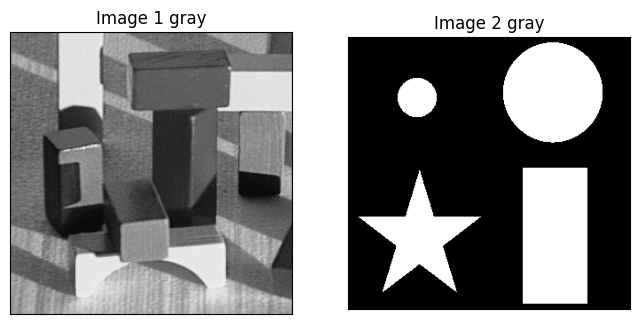

In [3]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Image 1 gray')
plt.imshow(img1_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 2 gray')
plt.imshow(img2_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

For this point, we will use the Prewitt and Sobel operators, which are characterized by detecting many edges but also by being insensitive to noise. The matrices for the Prewitt operator kernel are as follows:

In [4]:
# Kernel Prewitt X
kernel_prewitt_x = np.ones((3,3), np.float32) # matriz 3x3 de 1s
kernel_prewitt_x[0, 0] = kernel_prewitt_x[0,1] = kernel_prewitt_x[0, 2] = -1
kernel_prewitt_x[1, 0] = kernel_prewitt_x[1,1] = kernel_prewitt_x[1, 2] = 0
print("Kernel Prewitt X")
print(kernel_prewitt_x,"\n")

# Kernel Prewitt Y
kernel_prewitt_y = np.ones((3,3), np.float32) # matriz 3x3 de 1s
kernel_prewitt_y[0, 0] = kernel_prewitt_y[1,0] = kernel_prewitt_y[2, 0] = -1
kernel_prewitt_y[0, 1] = kernel_prewitt_y[1,1] = kernel_prewitt_y[2, 1] = 0
print("Kernel Prewitt Y")
print(kernel_prewitt_y)

Kernel Prewitt X
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]] 

Kernel Prewitt Y
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


And for the Sobel Kernel we have the following

In [5]:
# Kernel Sobel X
kernel_sobel_x = np.zeros((3,3), np.float32) # matriz 3x3 de 0s
kernel_sobel_x[0,0] = kernel_sobel_x[0, 2] = -1
kernel_sobel_x[0,1] = -2
kernel_sobel_x[2,0] = kernel_sobel_x[2, 2] = 1
kernel_sobel_x[2,1] = 2
print("Kernel Sobel X")
print(kernel_sobel_x,"\n")

# Kernel Sobel Y
kernel_sobel_y = np.zeros((3,3), np.float32) # matriz 3x3 de 0s
kernel_sobel_y[0,0] = kernel_sobel_y[2, 0] = -1
kernel_sobel_y[1,0] = -2
kernel_sobel_y[0,2] = kernel_sobel_y[2, 2] = 1
kernel_sobel_y[1,2] = 2
print("Kernel Sobel Y")
print(kernel_sobel_y)

Kernel Sobel X
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]] 

Kernel Sobel Y
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


We will apply the filter in X from the kernels created, using the filter2D method, with which we will be able to see the definition of the horizontal edges:

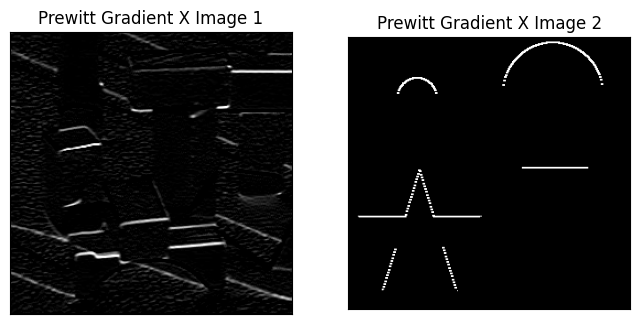

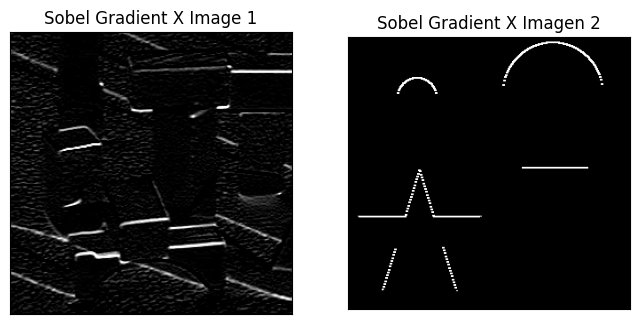

In [6]:
img1_edges_1_prewitt = cv2.filter2D(img1_gray, -1, kernel_prewitt_x)
img2_edges_1_prewitt = cv2.filter2D(img2_gray, -1, kernel_prewitt_x)
img1_edges_1_sobel = cv2.filter2D(img1_gray, -1, kernel_sobel_x)
img2_edges_1_sobel = cv2.filter2D(img2_gray, -1, kernel_sobel_x)

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Prewitt Gradient X Image 1')
plt.imshow(img1_edges_1_prewitt, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Prewitt Gradient X Image 2')
plt.imshow(img2_edges_1_prewitt, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Sobel Gradient X Image 1')
plt.imshow(img1_edges_1_sobel, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Sobel Gradient X Imagen 2')
plt.imshow(img2_edges_1_sobel, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

We will apply the Y filter to display the vertical edges:

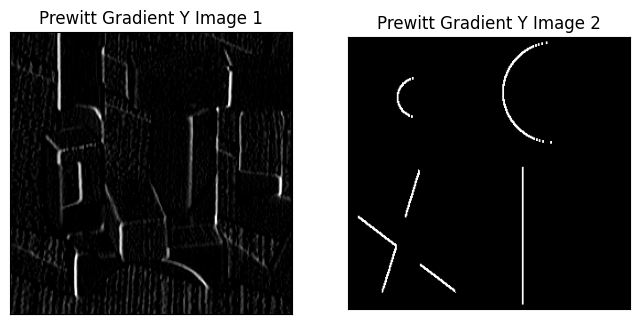

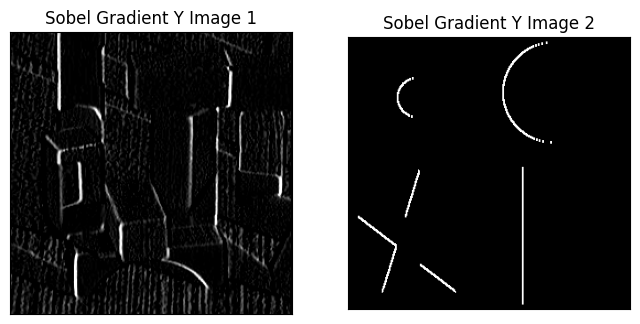

In [7]:
img1_edges_2_prewitt = cv2.filter2D(img1_gray, -1, kernel_prewitt_y)
img2_edges_2_prewitt = cv2.filter2D(img2_gray, -1, kernel_prewitt_y)
img1_edges_2_sobel = cv2.filter2D(img1_gray, -1, kernel_sobel_y)
img2_edges_2_sobel = cv2.filter2D(img2_gray, -1, kernel_sobel_y)

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Prewitt Gradient Y Image 1')
plt.imshow(img1_edges_2_prewitt, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Prewitt Gradient Y Image 2')
plt.imshow(img2_edges_2_prewitt, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Sobel Gradient Y Image 1')
plt.imshow(img1_edges_2_sobel, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Sobel Gradient Y Image 2')
plt.imshow(img2_edges_2_sobel, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

Finalmente, sumaremos ambos gradientes y obtendremos los bordes que proporciona este operador

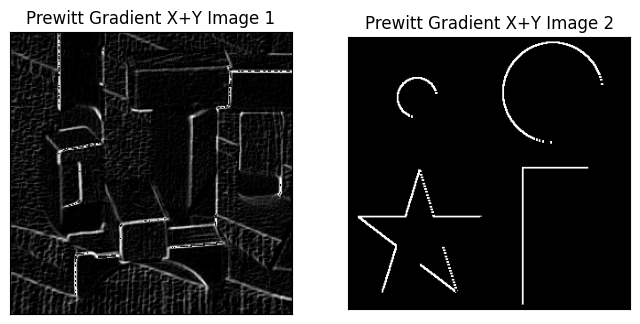

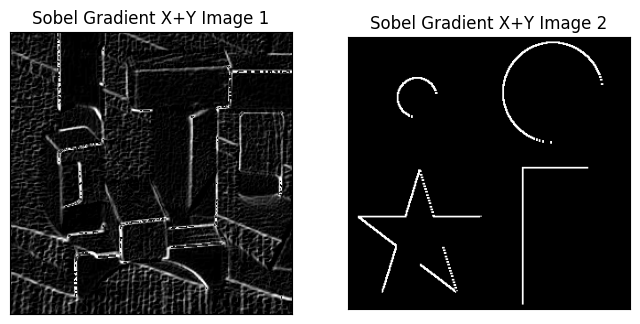

In [8]:
img1_edges_3_prewitt = img1_edges_1_prewitt + img1_edges_2_prewitt
img1_edges_3_sobel = img1_edges_1_sobel + img1_edges_2_sobel
img2_edges_3_prewitt = img2_edges_1_prewitt + img2_edges_2_prewitt
img2_edges_3_sobel = img2_edges_1_sobel + img2_edges_2_sobel

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Prewitt Gradient X+Y Image 1')
plt.imshow(img1_edges_3_prewitt, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Prewitt Gradient X+Y Image 2')
plt.imshow(img2_edges_3_prewitt, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Sobel Gradient X+Y Image 1')
plt.imshow(img1_edges_3_sobel, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Sobel Gradient X+Y Image 2')
plt.imshow(img2_edges_3_sobel, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

B) Perform grayscale edge detection of images 1 and 2 with the Kirsch Compass operator.

The Kirsch Compass operator is a nonlinear operator that detects edges in all cardinal directions (hence the name compass). In this sense, create 8 masks, one for each direction:

In [9]:
kirsch_compass_kernels = [np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]]), # North
                          np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]]), # Northwest
                          np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]]), # West
                          np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]]), # Southwest
                          np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]]), # South
                          np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]]), # Southeast
                          np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]]), # East
                          np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])] # Northeast

Next we will create the masks and add the results to obtain the result of the operator

In [10]:
img1_kirsch_compass = np.zeros((img1.shape[0],img1.shape[1]), np.uint8)
img2_kirsch_compass = np.zeros((img2.shape[0],img2.shape[1]), np.uint8)

for i in kirsch_compass_kernels:
  img1_kirsch_compass = img1_kirsch_compass + cv2.filter2D(img1_gray, -1, i)
  img2_kirsch_compass = img2_kirsch_compass + cv2.filter2D(img2_gray, -1, i)


Now we will view the results

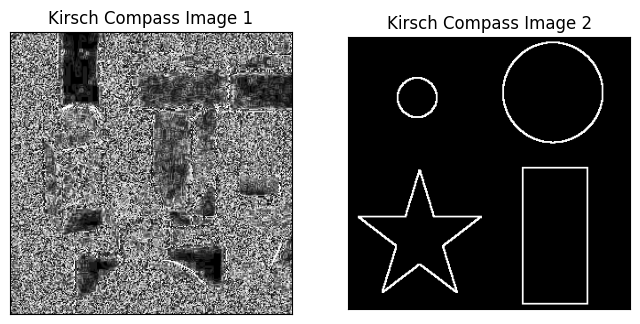

In [11]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('Kirsch Compass Image 1')
plt.imshow(img1_kirsch_compass, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Kirsch Compass Image 2')
plt.imshow(img2_kirsch_compass, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

C) Perform grayscale edge detection of images 2 and 3 with the Marr-Hilderth edge detector using the Laplacian of a Gaussian (LoG) Kernel, then perform detection of the detected edges of image 3 with intensities greater than 200.

The Marr-Hilderth edge detector is an algorithm that performs the convolution of the Laplacian of a Gaussian Function with the image. Below is the kernel produced by said Laplacian:

In [12]:
LoG_kernel = np.array([[0,0,-1,0,0],
                       [0,-1,-2,-1,0],
                       [-1,-2,16,-2,-1],
                       [0,-1,-2,-1,0],
                       [0,0,-1,0,0]])

Next we will perform the convolution with images 2 and 3 and visualize the results

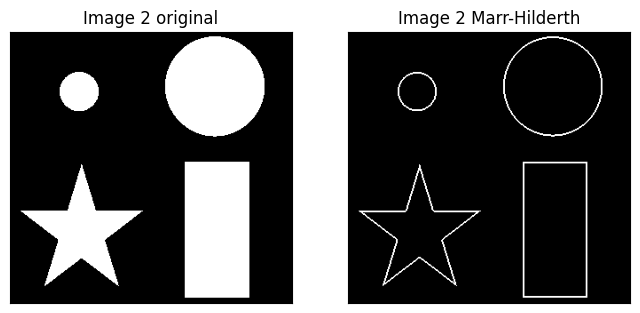

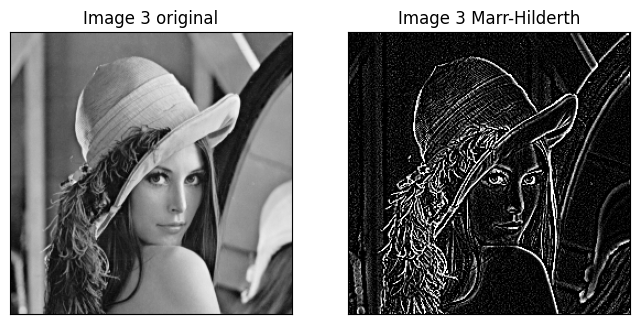

In [13]:
img2_MH = cv2.filter2D(img2_gray,-1,LoG_kernel)
img3_MH = cv2.filter2D(img3_gray,-1,LoG_kernel)

plt.figure(figsize=(8,8))

plt.subplot(121)
plt.title('Image 2 original')
plt.imshow(img2_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 2 Marr-Hilderth')
plt.imshow(img2_MH, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(8,8))

plt.subplot(121)
plt.title('Image 3 original')
plt.imshow(img3_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 3 Marr-Hilderth')
plt.imshow(img3_MH, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

Finally, we will display the detected edges of image 3 with intensities greater than 200

In [14]:
img3_MH_200 = img3_MH

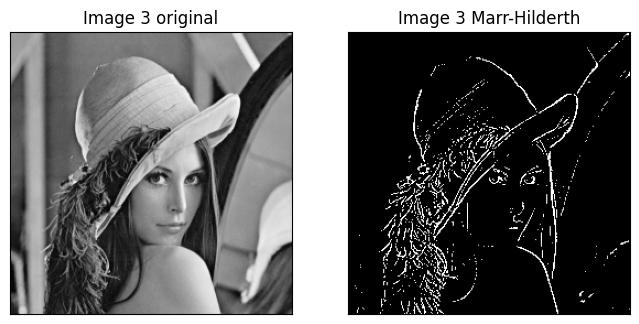

In [15]:
img3_MH_200[img3_MH_200<200] = 0

plt.figure(figsize=(8,8))

plt.subplot(121)
plt.title('Image 3 original')
plt.imshow(img3_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 3 Marr-Hilderth')
plt.imshow(img3_MH_200, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

D) Perform grayscale edge detection of images 2 and 3 with Canny edge detector using cv2.Canny() function, compare the edge detection result of image 3 with the result of detection of Marr-Hilderth edges with intensities greater than 200. Additionally, explain what the “Non-maximum Suppression” stage of the Canny detector consists of.

Canny edge detection is a popular edge detection algorithm developed by John F. Canny that first removes noise using a 5x5 Gaussian filter.

Then find the intensity gradient of the image using a sobel kernel on both the

Then follows the **Non-maximum Suppression** stage, in which all the pixels of the image are scanned and those that do not constitute the edges are removed. For this, we check whether each pixel is a local maximum in its environment in the direction of the gradient. If it is a maximum, it is considered for the next stage, if not, its value changes to zero.

The final stage is the Hysteresis Thresholding stage, which defines which edges are truly edges and which are not. For this stage two values are needed, a minimum and all pixels below that minimum are discarded, and a maximum and all pixels above that maximum are considered safe edges. Those that are between both values are classified as edges or non-edges depending on their connectivity with neighboring pixels.

Below the implementation for the image with minimum value of 100 and maximum of 200

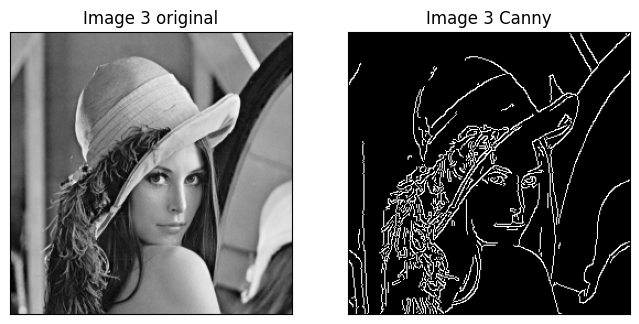

In [16]:
img3_canny = cv2.Canny(img3_gray,100,200)

plt.figure(figsize=(8,8))

plt.subplot(121)
plt.title('Image 3 original')
plt.imshow(img3_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 3 Canny')
plt.imshow(img3_canny, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

Compared to the Marr-Hilderth filter with intensities greater than 200, the Canny operator has smoother edges since it uses neighborhoods, is less sensitive to noise since it has a noise reduction stage, and better identifies the edges that the previous filter.

**THRESHOLDING**

A) Perform manual thresholding with a single threshold of images 1 and 4 with the help of their histograms, then if possible, perform grayscale segmentation with the masks generated by manual thresholding.

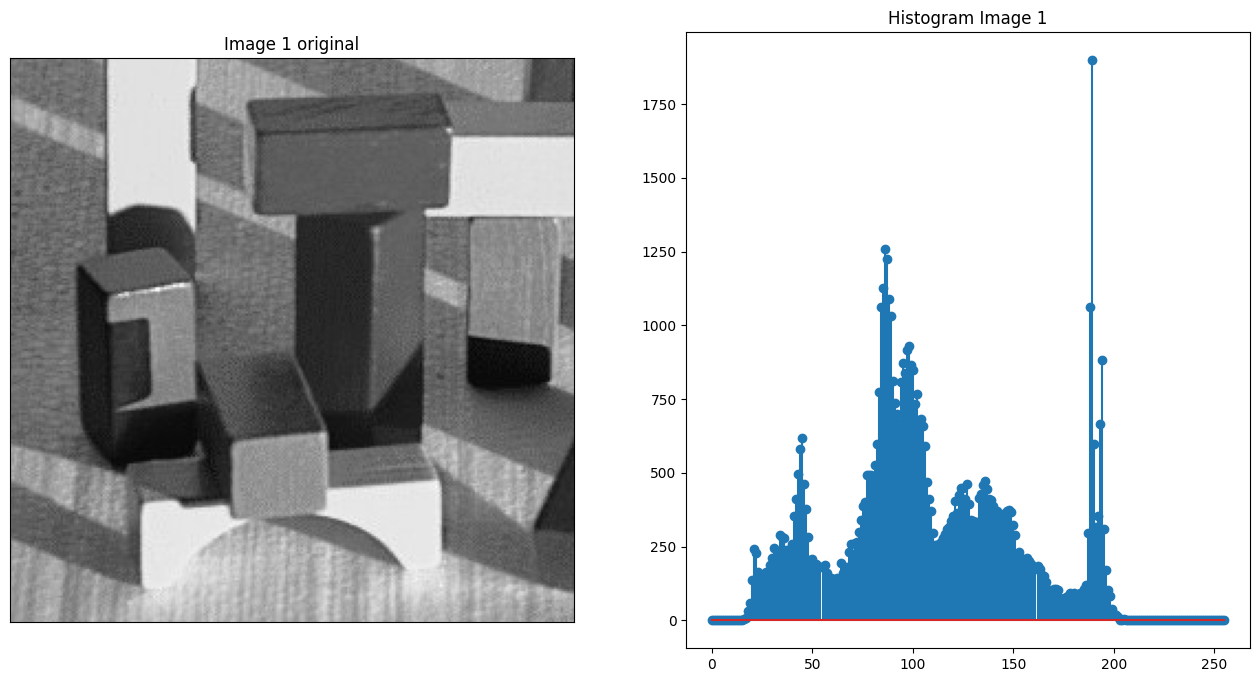

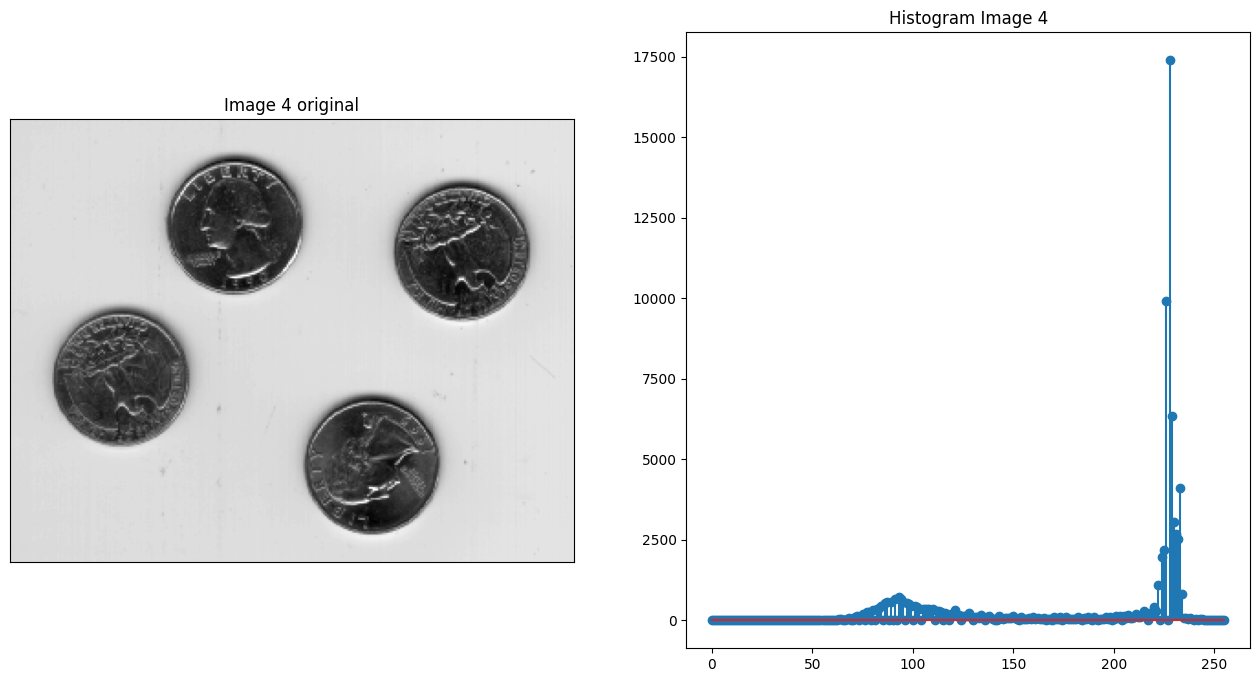

In [17]:
# Creación de histogramas

hist1_gray = cv2.calcHist([img1_gray],[0],None,[256],[0,256])
plt.figure(figsize=(16,8)) # crear figura de 16 x 8

plt.subplot(121)
plt.title('Image 1 original')
plt.imshow(img1_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Histogram Image 1')
plt.stem(hist1_gray)

plt.show()

hist4_gray = cv2.calcHist([img4_gray],[0],None,[256],[0,256])
plt.figure(figsize=(16,8)) # crear figura de 16 x 8

plt.subplot(121)
plt.title('Image 4 original')
plt.imshow(img4_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Histogram Image 4')
plt.stem(hist4_gray)

plt.show()

From the histogram, we set the thresholds to 110 for the first image and 175 for the second image.

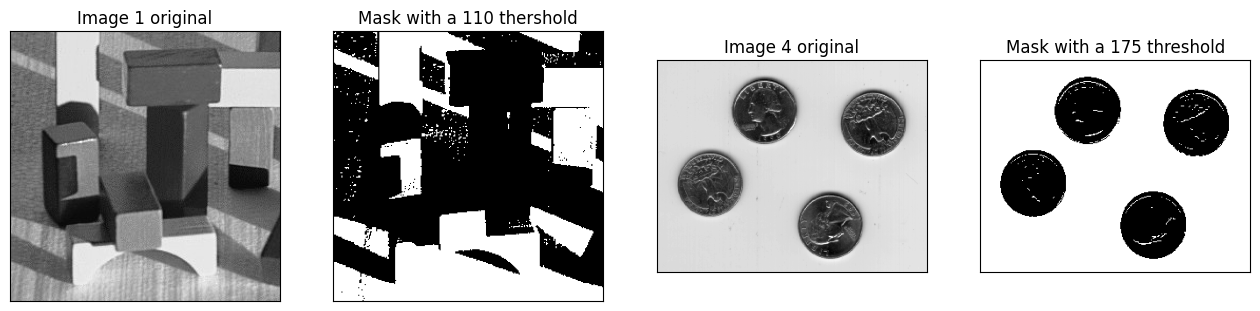

In [18]:
T1 = 110;
T2 = 175;

[_,mask1] = cv2.threshold(img1_gray,T1,255,cv2.THRESH_BINARY)
[_,mask2] = cv2.threshold(img4_gray,T2,255,cv2.THRESH_BINARY)

plt.figure(figsize=(16,16)) # crear figura de 16 x 16

plt.subplot(141)
plt.title('Image 1 original')
plt.imshow(img1_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.title('Mask with a 110 thershold')
plt.imshow(mask1, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.title('Image 4 original')
plt.imshow(img4_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.title('Mask with a 175 threshold')
plt.imshow(mask2, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()


We will apply the masks with the threshold to the images

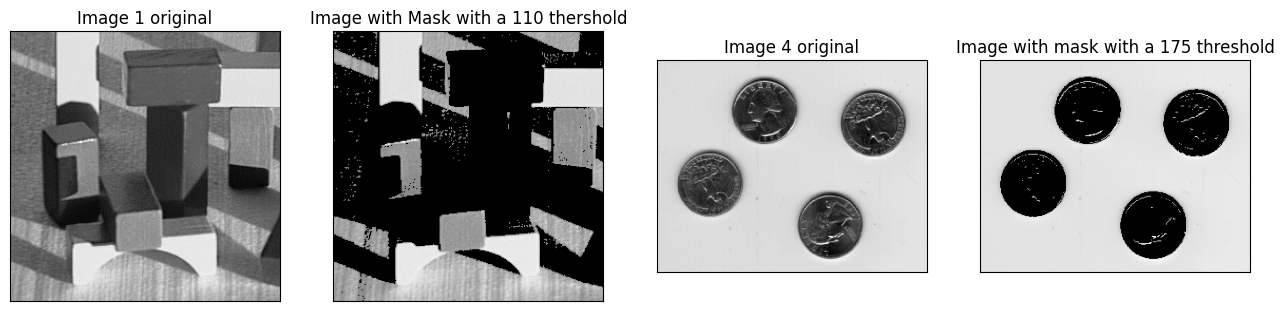

In [19]:
img1_umbral_manual = cv2.bitwise_and(img1_gray,img1_gray,mask = mask1)
img4_umbral_manual = cv2.bitwise_and(img4_gray,img4_gray,mask = mask2)

plt.figure(figsize=(16,16)) # crear figura de 16 x 16

plt.subplot(141)
plt.title('Image 1 original')
plt.imshow(img1_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.title('Image with Mask with a 110 thershold')
plt.imshow(img1_umbral_manual, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.title('Image 4 original')
plt.imshow(img4_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.title('Image with mask with a 175 threshold')
plt.imshow(img4_umbral_manual, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()


B) Perform thresholding with the OTSU method on images 1 and 4, and compare the result with manual thresholding, then if possible, perform segmentation on
gray scale with the masks generated by thresholding with the OTSU method.

Optimal Threshold first Image:  117.0
UOptimal Threshold second Image:  165.0


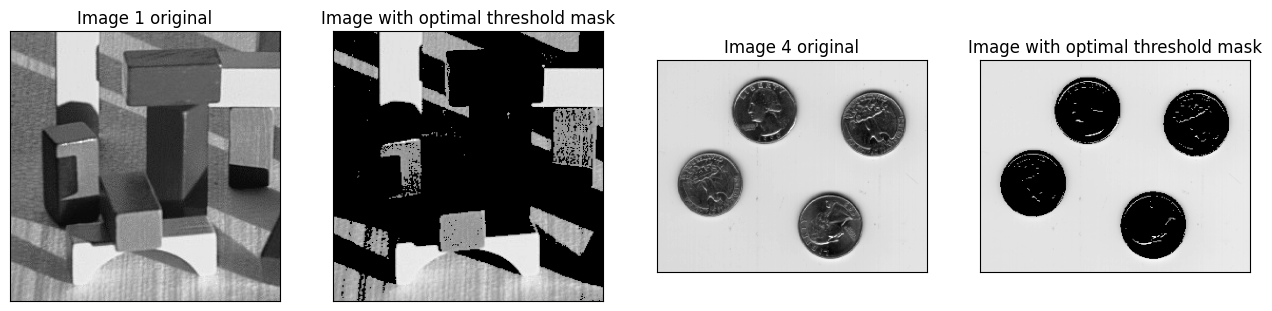

In [20]:
[k1,mask1_otsu] = cv2.threshold(img1_gray,0,255, cv2.THRESH_OTSU)
print("Optimal Threshold first Image: ",k1)

[k2,mask2_otsu] = cv2.threshold(img4_gray,0,255, cv2.THRESH_OTSU)
print("UOptimal Threshold second Image: ",k2)

img1_umbral_otsu = cv2.bitwise_and(img1_gray,img1_gray,mask = mask1_otsu)
img4_umbral_otsu = cv2.bitwise_and(img4_gray,img4_gray,mask = mask2_otsu)

plt.figure(figsize=(16,16)) # crear figura de 16 x 16

plt.subplot(141)
plt.title('Image 1 original')
plt.imshow(img1_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.title('Image with optimal threshold mask')
plt.imshow(img1_umbral_otsu, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.title('Image 4 original')
plt.imshow(img4_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.title('Image with optimal threshold mask')
plt.imshow(img4_umbral_otsu, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

C) Explain why image 1 cannot be segmented by thresholding with a single threshold and image 4 can.

Image 4 has two well-defined sections: the coins and the background; while image 1 has different shades of gray and does not have two well-defined sections. Since single-threshold segmentation generates only two sections, image 4 can be segmented by single-threshold thresholding and image 1 cannot.

**SEGMENTATION THROUGH CLUSTERING**

Perform color segmentation of images 4 and 5 using the segmentation mask generated by the k-means clustering method, analyze the number of regions necessary to perform each of the Segmentations, you can join regions if necessary.

To begin, we will analyze the original images to define the number of regions we want to generate:

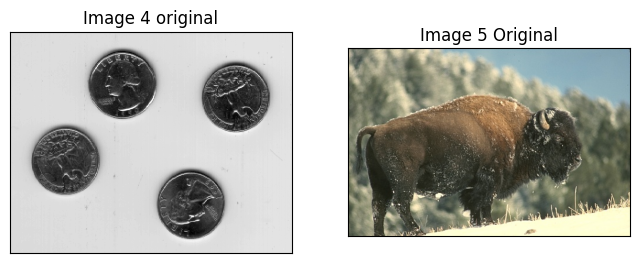

In [21]:
plt.figure(figsize=(8,8))

plt.subplot(121)
plt.title('Image 4 original')
plt.imshow(img4_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 5 Original')
plt.imshow(img5_rgb, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

In image 4, you can distinguish 2 regions very clearly: the coins and the background. In image 5 you can see 4 regions: The grass, the bison, the forest and the sky. We will try to use the optimal number of clusters and if necessary combine classes to separate the regions

In [22]:
K1 = 2
K2 = 20
Z1 = img4_rgb.reshape((-1,3))
Z1 = np.float32(Z1)
Z2 = img5_rgb.reshape((-1,3))
Z2 = np.float32(Z2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
[_, label1, center1] = cv2.kmeans(Z1, K1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
[_, label2, center2] = cv2.kmeans(Z2, K2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [23]:
center1 = np.uint8(center1)
center_mask1 = center1[label1.flatten()]
mask1 = center_mask1.reshape((img4_rgb.shape))

center2 = np.uint8(center2)
center_mask2 = center2[label2.flatten()]
mask2 = center_mask2.reshape((img5_rgb.shape))

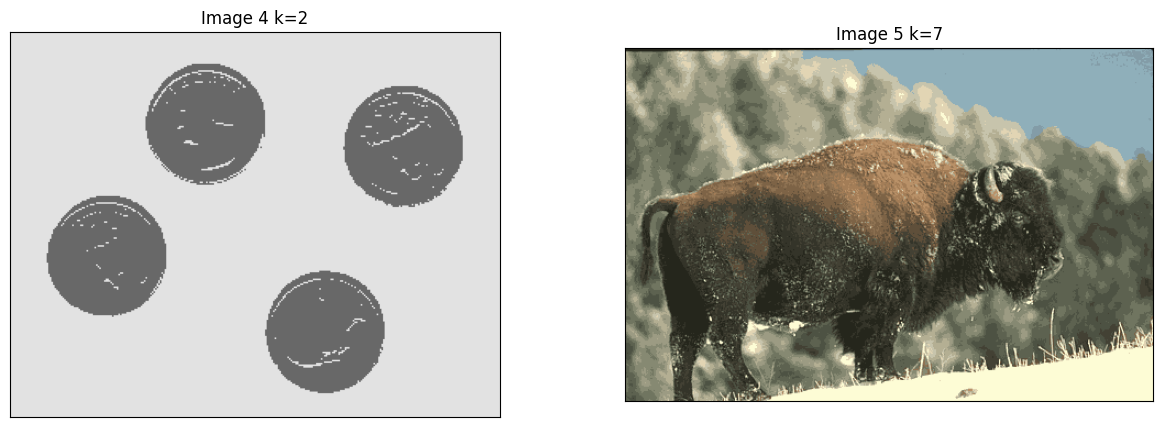

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Image 4 k=2')
plt.imshow(mask1)
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Image 5 k=7')
plt.imshow(mask2)
plt.xticks([]), plt.yticks([])

plt.show()

We can see that it correctly segments the coins but that the image of the bison is not so clear.

To better see the segmentation of the second image, we will begin by identifying the clusters that correspond to the bison and we will mark them in red:

**NOTE:** This implementation works with a specific centroid seed, so running it again may change the results. In any case, the final segmentation is saved and attached in the folder

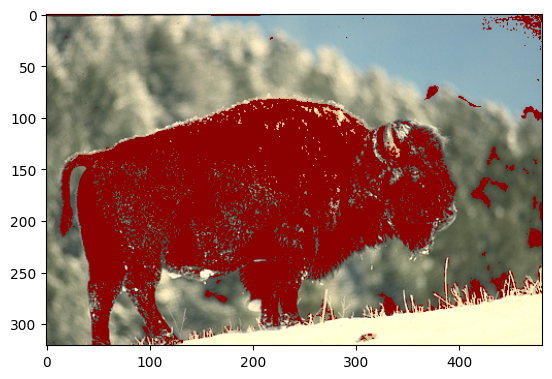

In [25]:
masked_img5 = np.copy(img5_rgb)
label2 = label2.flatten()
masked_img5 = masked_img5.reshape((-1, 3))

clusters_bisonte = [0,2,5,7,9,10,15,16,18,19,20]
for cluster in clusters_bisonte:
  masked_img5[label2 == cluster] = [139, 0, 0]

masked_img5 = masked_img5.reshape(img5_rgb.shape)
plt.imshow(masked_img5)
plt.show()

Now we will identify the forest in green:

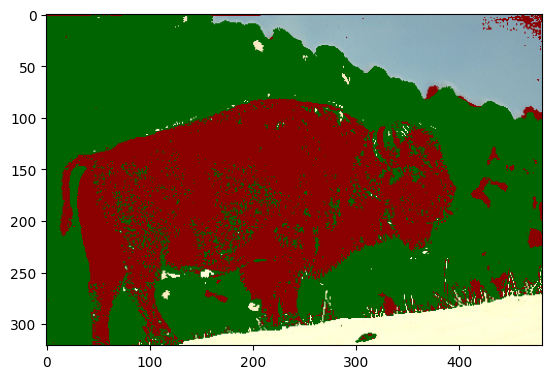

In [26]:
masked1_img5 = np.copy(masked_img5)
label2 = label2.flatten()
masked1_img5 = masked1_img5.reshape((-1, 3))

clusters_bosque = [3,4,6,8,12,13,14,17]
for cluster in clusters_bosque:
  masked1_img5[label2 == cluster] = [0, 100, 0]

masked1_img5 = masked1_img5.reshape(img5_rgb.shape)
plt.imshow(masked1_img5)
plt.show()

Next, we will get the sky in blue and the floor in black:

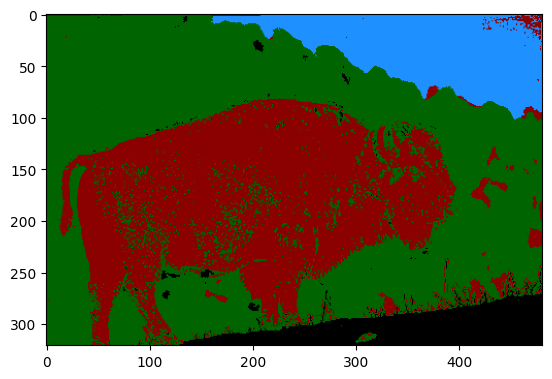

In [27]:
masked2_img5 = np.copy(masked1_img5)
label2 = label2.flatten()
masked2_img5 = masked2_img5.reshape((-1, 3))

masked2_img5[label2 == 1] = [30, 144, 255] # sky
masked2_img5[label2 == 11] = [0, 0, 0] # floor

masked2_img5 = masked2_img5.reshape(img5_rgb.shape)
plt.imshow(masked2_img5)
plt.show()

With which we have completed the segmentation by image regions
